# Data Cleaning

In [175]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [177]:
import os

In [179]:
os.getcwd()

'C:\\Users\\USER\\Documents\\Data science and Machine learning\\Projects\\Sports image classification\\Model'

In [181]:
os.listdir()

['.ipynb_checkpoints',
 'Data Model.ipynb',
 'data set',
 'Model - Shortcut.lnk',
 'opencv',
 'requirement.txt',
 'test images']

***When we examine a picture, we usually recognize an individual by looking at their face. An image may have several faces, with some faces possibly being obstructed or unclear. The initial stage in our pre-processing pipeline involves identifying faces in a picture. After detecting a face, we will proceed to detect the eyes. If two eyes are successfully detected, we will retain the image; otherwise, we will discard it.***


In [326]:
img = cv2.imread('./test images/Serena Williams.jpg')
img.shape

#In simpler terms, this code reads the picture file of Serena Williams and tells you its size in terms of its height, width, and how many color layers it has (usually 3 for red, green, and blue).

(1500, 1000, 3)

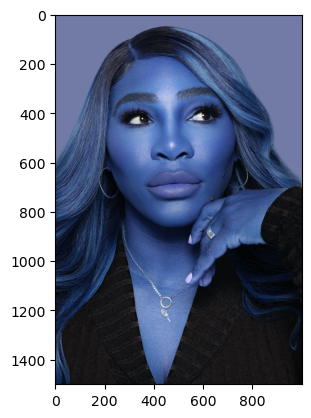

In [328]:
plt.imshow(img)
#In simpler terms, this code takes the picture of Serena Williams that you loaded and shows it on the screen so you can see it.

In [330]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray.shape

#In simpler terms, this code changes the color picture of Serena Williams into a black-and-white version and then tells you the size of this black-and-white image.

(1500, 1000)

In [189]:
gray

array([[135, 135, 135, ..., 135, 135, 135],
       [135, 135, 135, ..., 135, 135, 135],
       [135, 135, 135, ..., 135, 135, 135],
       ...,
       [ 37,  31,  35, ...,   7,   7,   7],
       [ 40,  40,  47, ...,   7,   7,   7],
       [ 35,  49,  48, ...,   7,   6,   6]], dtype=uint8)

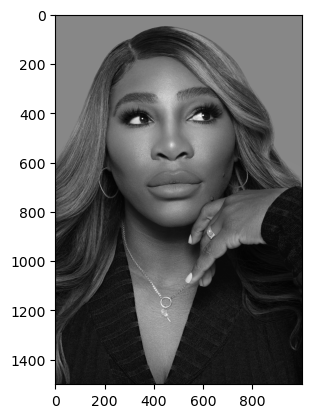

In [332]:
plt.imshow(gray, cmap='gray')

#In simpler terms, this code shows the black-and-white version of the Serena Williams picture on the screen, making sure it appears in proper grayscale.

In [334]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

#In simpler terms, this code loads special tools that can find faces and eyes in pictures. Then, it uses the face detection tool to search the black-and-white picture of Serena Williams for any faces. If it finds any, it will give you the positions and sizes of those faces.

array([[184, 195, 585, 585]])

In [195]:
(x,y,w,h) = faces[0]
x,y,w,h

(184, 195, 585, 585)

In [338]:
face_img = cv2.rectangle (img, (x,y), (x+w,y+h), (255,0,0),2)
plt.imshow(face_img)

#cv2.rectangle(img, (x, y), (x+w, y+h), (255,0,0), 2): This line draws a rectangle on the image img. The rectangle's top-left corner is at (x, y), and the bottom-right corner is at (x+w, y+h), where x, y, w, and h are the coordinates and dimensions of the detected face. The rectangle is drawn in blue (represented by the color (255, 0, 0) in BGR format) with a thickness of 2 pixels. The resulting image with the rectangle is stored in face_img.

error: OpenCV(4.10.0) :-1: error: (-5:Bad argument) in function 'rectangle'
> Overload resolution failed:
>  - Can't parse 'pt1'. Sequence item with index 1 has a wrong type
>  - Can't parse 'pt1'. Sequence item with index 1 has a wrong type
>  - Can't parse 'rec'. Expected sequence length 4, got 2
>  - Can't parse 'rec'. Expected sequence length 4, got 2


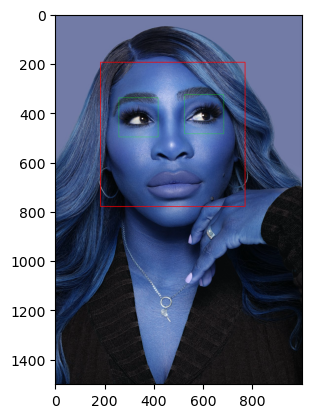

In [342]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_ing = cv2.rectangle(img, (x,y), (x+w,y+h), (255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex, ey, ew, eh) in eyes:
        cv2. rectangle(roi_color, (ex,ey), (ex + ew, ey +eh), (0,255,0,2))

plt.figure()
plt.imshow(face_img, cmap= 'gray')
plt.show()

***Crop the facial image***

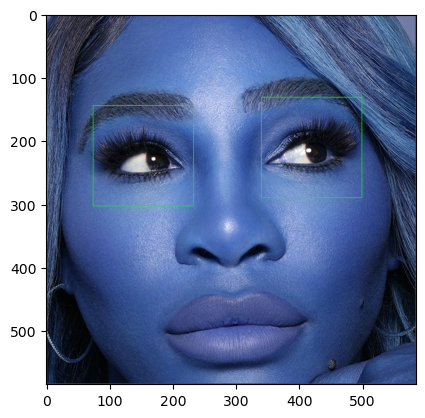

In [201]:
%matplotlib inline
plt.imshow(roi_color, cmap= 'gray')

In [203]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3,5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

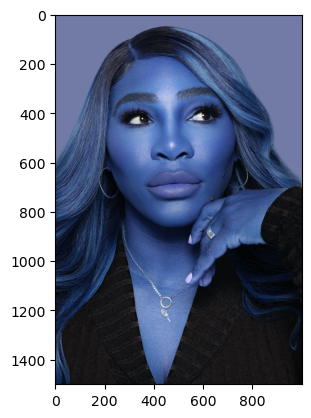

In [205]:
original_image =  cv2.imread('./test images/Serena Williams.jpg')
plt.imshow(original_image)

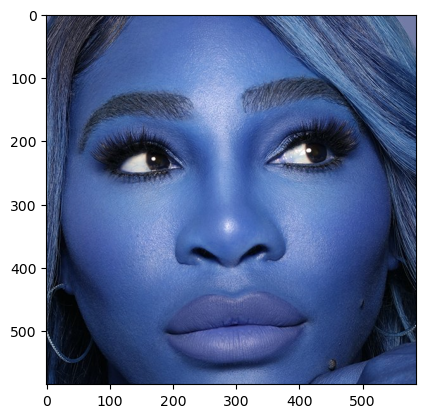

In [207]:
cropped_image = get_cropped_image_if_2_eyes ('./test images/Serena Williams.jpg')
plt.imshow (cropped_image)

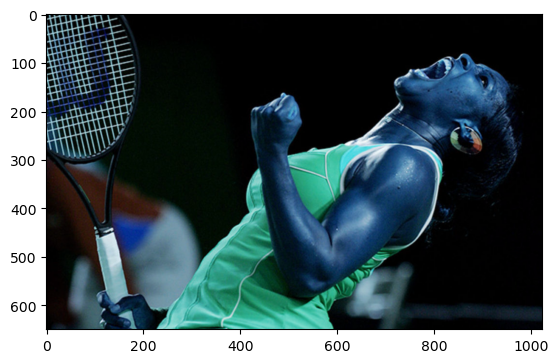

In [209]:
org_image_obstructed = cv2.imread('./test images/serena no eyes.jpg')
plt.imshow(org_image_obstructed)

In [225]:
cropped_image_no_2_eyes = get_cropped_image_if_2_eyes('./test images/serena no eyes.jpg')
cropped_image_no_2_eyes

In [227]:
path_to_data = "./data set/"
path_to_cr_data = "./data set/cropped/"

In [229]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [231]:
img_dirs

['./data set/lionel_messi',
 './data set/maria_sharapova',
 './data set/Ronaldo',
 './data set/serena_williams',
 './data set/virat_kohli']

In [233]:
import shutil
if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [235]:
cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)

    celebrity_file_names_dict[celebrity_name] = []

    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
    
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name 
            
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1    


lionel_messi
Generating cropped images in folder:  ./data set/cropped/lionel_messi
maria_sharapova
Generating cropped images in folder:  ./data set/cropped/maria_sharapova
Ronaldo
Generating cropped images in folder:  ./data set/cropped/Ronaldo
serena_williams
Generating cropped images in folder:  ./data set/cropped/serena_williams
virat_kohli
Generating cropped images in folder:  ./data set/cropped/virat_kohli


# Feature Engineering: Use wavelet transform as a feature for traning our model

In [237]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

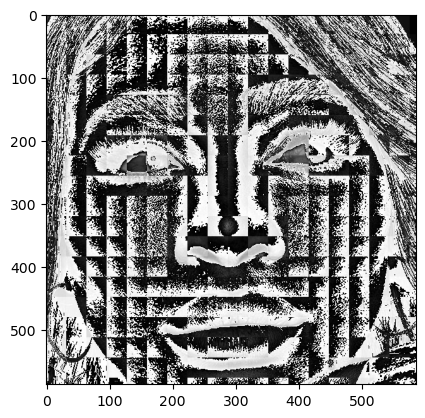

In [239]:
im_har = w2d(cropped_image,'db1',5)
plt.imshow(im_har, cmap='gray')

 ***You can see above a wavelet-transformed image that gives clues on facial features such as eyes, nose, lips etc. This along with raw pixel image can be used as input for our classifier***

In [241]:
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{'lionel_messi': ['./data set/cropped/lionel_messi\\lionel_messi1.png',
  './data set/cropped/lionel_messi\\lionel_messi10.png',
  './data set/cropped/lionel_messi\\lionel_messi12.png',
  './data set/cropped/lionel_messi\\lionel_messi13.png',
  './data set/cropped/lionel_messi\\lionel_messi15.png',
  './data set/cropped/lionel_messi\\lionel_messi17.png',
  './data set/cropped/lionel_messi\\lionel_messi18.png',
  './data set/cropped/lionel_messi\\lionel_messi19.png',
  './data set/cropped/lionel_messi\\lionel_messi2.png',
  './data set/cropped/lionel_messi\\lionel_messi20.png',
  './data set/cropped/lionel_messi\\lionel_messi21.png',
  './data set/cropped/lionel_messi\\lionel_messi22.png',
  './data set/cropped/lionel_messi\\lionel_messi23.png',
  './data set/cropped/lionel_messi\\lionel_messi24.png',
  './data set/cropped/lionel_messi\\lionel_messi25.png',
  './data set/cropped/lionel_messi\\lionel_messi26.png',
  './data set/cropped/lionel_messi\\lionel_messi27.png',
  './data set/cro

In [243]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'lionel_messi': 0,
 'maria_sharapova': 1,
 'Ronaldo': 2,
 'serena_williams': 3,
 'virat_kohli': 4}

In [245]:
X = [] 
y = []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])     

In [246]:
len (X[0])

4096

In [249]:
32*32*3 + 32*32

4096

In [251]:
X[0]

array([[82],
       [52],
       [60],
       ...,
       [27],
       [23],
       [35]], dtype=uint8)

In [253]:
y[0]

0

In [255]:
X = np.array(X).reshape(len(X),4096).astype(float
                                         
                                           )
X.shape

(185, 4096)

In [257]:
X[0]

array([82., 52., 60., ..., 27., 23., 35.])

# Training a Model

***Goal is to come up with best fine model with best fine tuned parameters***

In [275]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [277]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 0)
pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score (X_test, y_test)

0.7659574468085106

In [279]:
len(X_test)

47

In [265]:
print (classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.65      0.92      0.76        12
           1       0.89      0.80      0.84        10
           2       0.86      0.86      0.86         7
           3       0.67      0.50      0.57         8
           4       0.88      0.70      0.78        10

    accuracy                           0.77        47
   macro avg       0.79      0.75      0.76        47
weighted avg       0.78      0.77      0.76        47



In [281]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}
scores = []

In [283]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.774868,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.601587,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.796825,{'logisticregression__C': 1}


In [287]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [296]:
best_estimators['logistic_regression']. score(X_test,y_test)

0.8085106382978723

In [298]:
best_estimators['svm']. score(X_test,y_test)

0.8723404255319149

In [300]:
best_estimators['random_forest']. score(X_test,y_test)

0.6382978723404256

In [308]:
best_clf = best_estimators ['logistic_regression']

In [310]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[9, 1, 1, 0, 1],
       [1, 7, 1, 1, 0],
       [0, 0, 7, 0, 0],
       [0, 0, 1, 6, 1],
       [0, 0, 0, 1, 9]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

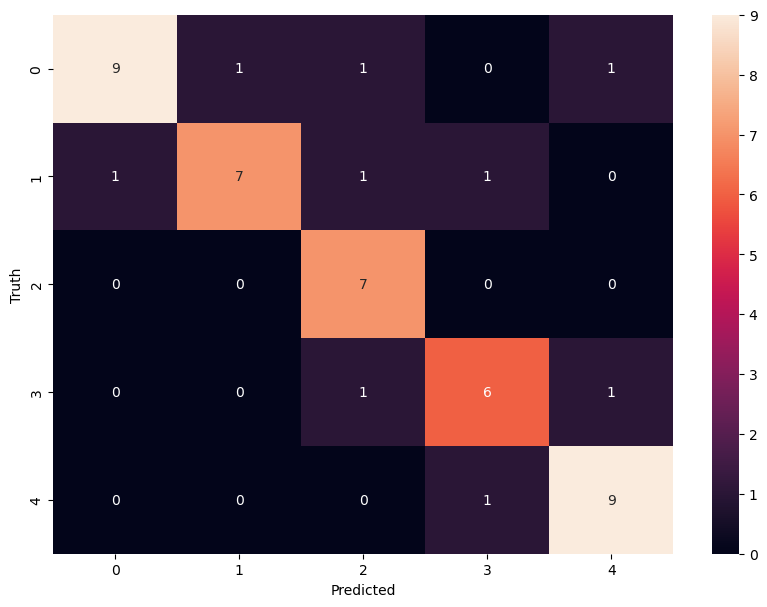

In [318]:
import seaborn as sn
plt.figure (figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')


In [316]:
class_dict

{'lionel_messi': 0,
 'maria_sharapova': 1,
 'Ronaldo': 2,
 'serena_williams': 3,
 'virat_kohli': 4}

In [322]:
import joblib
joblib.dump(best_clf, 'saved_model.pkl')

['saved_model.pkl']

In [324]:
import json
with open ("class_dictionary.json", "w") as f:
    f.write(json.dumps(class_dict))